In [1]:
import sys
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sys.path.append('../')

In [75]:
df_draft = pd.read_csv('../data/clean_nfl_draft.csv')
#df_draft.drop(['Unnamed: 0'],inplace=True,axis=1)

In [76]:
df_draft.head()

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,carrer_years
0,WinsJa00,2015,1.0,1,TAM,Jameis Winston,QB,QB,13,21.0,...,311.0,7.0,0.0,0.0,0.0,0.0,0.0,0,Florida St.,2.0
1,MariMa01,2015,1.0,2,TEN,Marcus Mariota,QB,QB,9,21.0,...,516.0,4.0,1.0,41.0,1.0,0.0,0.0,0,Oregon,2.0
2,FowlDa00,2015,1.0,3,JAX,Dante Fowler,OLB,LB,0,21.0,...,0.0,0.0,0.0,0.0,0.0,16.0,0.0,2.5,Florida,2.0
3,CoopAm00,2015,1.0,4,OAK,Amari Cooper,WR,WR,9,21.0,...,-3.0,0.0,134.0,1970.0,9.0,0.0,0.0,0,Alabama,2.0
4,ScheBr00,2015,1.0,5,WAS,Brandon Scherff,T,T,7,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Iowa,2.0


In [77]:
#Divisao do dataset em posições
positions = set(df_draft['Position Standard'])
Positions = {}
info = list()
for pos in positions:
    Positions[pos] = df_draft[df_draft['Position Standard'] == pos]

In [79]:
#Divisão do dataset em anos de carreira
Carrer_years = {}
Carrer_years['0-5'] = df_draft[df_draft['carrer_years'] <= 5]
Carrer_years['6-10'] = df_draft[(df_draft['carrer_years'] >5)  & (df_draft['carrer_years'] <= 10)]
Carrer_years['11-15'] = df_draft[(df_draft['carrer_years'] > 10) & (df_draft['carrer_years'] <= 15)]
Carrer_years['16-20'] = df_draft[df_draft['carrer_years'] > 15]

In [80]:
#Total de posições que cada College/Univ "ofereceu" ao draft
College_Position = df_draft.groupby(['College/Univ','Position Standard']).count()['Player_Id']
College_Position2 = df_draft.groupby(['Position Standard','College/Univ']).count()['Player_Id']

In [81]:
#Draft AV por time a cada ano
DrAV_Team_Year = df_draft.groupby(['Tm','Year']).sum()['DrAV']

In [8]:
DrAV_Team_Year

Tm   Year
ARI  1994     51.0
     1995     49.0
     1996     71.0
     1997     96.0
     1998     89.0
     1999     65.0
     2000     49.0
     2001    129.0
     2002     34.0
     2003    155.0
     2004    238.0
     2005     53.0
     2006     61.0
     2007     63.0
     2008    117.0
     2009     55.0
     2010     85.0
     2011     98.0
     2012     56.0
     2013     70.0
     2014     32.0
     2015     22.0
ATL  1985    101.0
     1986     73.0
     1987     63.0
     1988    105.0
     1989     57.0
     1990     46.0
     1991     88.0
     1992    118.0
             ...  
WAS  1986    133.0
     1987     67.0
     1988     25.0
     1989     54.0
     1990     81.0
     1991     36.0
     1992     17.0
     1993     66.0
     1994    114.0
     1995    111.0
     1996     60.0
     1997    102.0
     1998     56.0
     1999     94.0
     2000    111.0
     2001     63.0
     2002     61.0
     2003     33.0
     2004     66.0
     2005     55.0
     2006     93.0
  

In [97]:
#Para cada posição, imprime o College/Univ. com mais atletas draftados da posição e a quantidade
for pos in positions:
    top_pos = College_Position2[pos].index[list(College_Position2[pos]).index(College_Position2[pos].max())]
    print("Position: " + pos + " -- " + "Top College: " + top_pos + ' -- ' + "Athlets: " + str(College_Position2[pos].max()))

Position: DE -- Top College: Florida St. -- Athlets: 14
Position: LB -- Top College: Penn St. -- Athlets: 25
Position: P -- Top College: Michigan St. -- Athlets: 4
Position: TE -- Top College: Notre Dame -- Athlets: 13
Position: QB -- Top College: Oregon -- Athlets: 9
Position: T -- Top College: Texas A&M -- Athlets: 12
Position: G -- Top College: Penn St. -- Athlets: 13
Position: DB -- Top College: Nebraska -- Athlets: 32
Position: K -- Top College: Georgia -- Athlets: 4
Position: FB -- Top College: Auburn -- Athlets: 4
Position: C -- Top College: Notre Dame -- Athlets: 8
Position: RB -- Top College: Miami (FL) -- Athlets: 16
Position: DT -- Top College: Florida St. -- Athlets: 17
Position: WR -- Top College: Florida St. -- Athlets: 22


In [101]:
teams = set(df_draft['Tm'])
for team in teams:
    #print -- Time -- Best Year -- Year
    top_year = DrAV_Team_Year[team].index[list(DrAV_Team_Year[team]).index(DrAV_Team_Year[team].max())]
    print("Team: " + team + ' -- ' + "Best Draft: " + str(top_year) + ' -- ' + "DrAV: " + str(DrAV_Team_Year[team].max()))

Team: KAN -- Best Draft: 2008 -- DrAV: 189.0
Team: TAM -- Best Draft: 1995 -- DrAV: 265.0
Team: NYJ -- Best Draft: 2000 -- DrAV: 213.0
Team: DAL -- Best Draft: 2005 -- DrAV: 241.0
Team: RAM -- Best Draft: 1994 -- DrAV: 170.0
Team: BAL -- Best Draft: 1996 -- DrAV: 291.0
Team: NWE -- Best Draft: 1993 -- DrAV: 244.0
Team: TEN -- Best Draft: 2005 -- DrAV: 187.0
Team: GNB -- Best Draft: 2000 -- DrAV: 232.0
Team: NOR -- Best Draft: 2006 -- DrAV: 286.0
Team: SFO -- Best Draft: 1986 -- DrAV: 345.0
Team: BUF -- Best Draft: 1985 -- DrAV: 293.0
Team: CLE -- Best Draft: 1999 -- DrAV: 125.0
Team: WAS -- Best Draft: 1986 -- DrAV: 133.0
Team: SEA -- Best Draft: 1990 -- DrAV: 248.0
Team: CAR -- Best Draft: 2001 -- DrAV: 187.0
Team: JAX -- Best Draft: 2002 -- DrAV: 166.0
Team: ARI -- Best Draft: 2004 -- DrAV: 238.0
Team: CIN -- Best Draft: 2001 -- DrAV: 210.0
Team: CHI -- Best Draft: 2003 -- DrAV: 235.0
Team: RAI -- Best Draft: 1988 -- DrAV: 203.0
Team: ATL -- Best Draft: 2008 -- DrAV: 248.0
Team: SDG 

In [105]:
first_pick_pos = df_draft.groupby(['Position Standard','Year']).min()['Pick']

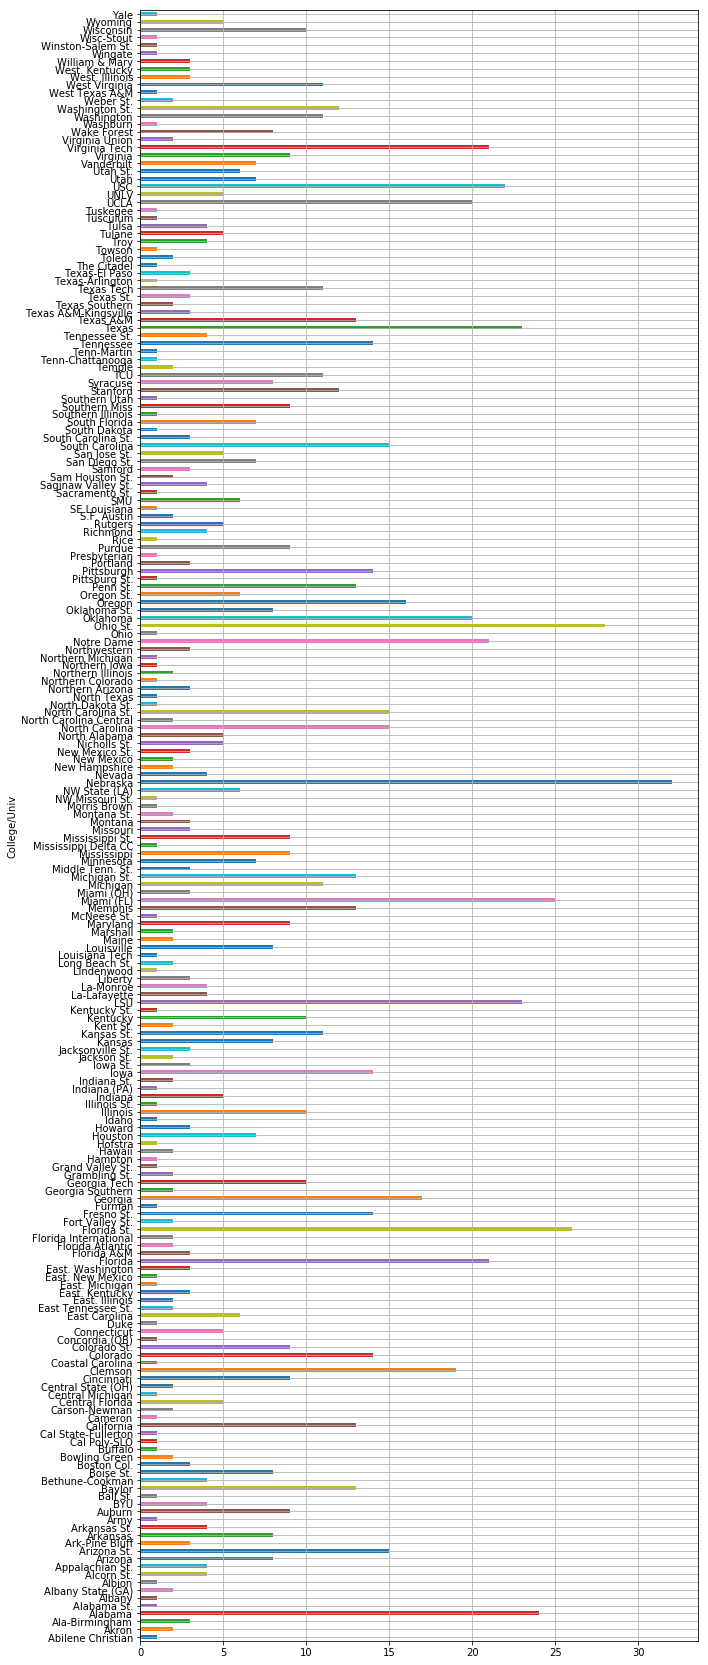

In [33]:
College_Position2['DB'].plot(kind='barh',figsize=(10,30),grid=True)

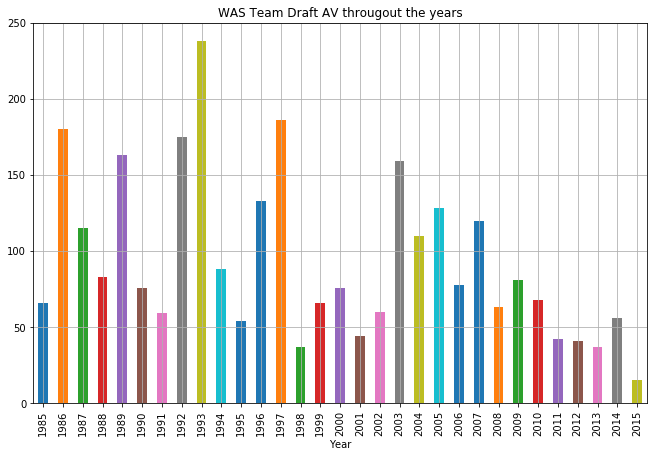

In [20]:
teams = set(df_draft['Tm'])
DrAV_Team_Year['NYG'].plot(kind='bar',figsize=(11,7),title='WAS Team Draft AV througout the years',grid=True)

In [128]:
#Media da diferença entre CarAV e First4AV de todas as posições entre intervalos de carreira
zero_five_diff = (Carrer_years['0-5']['CarAV'] - Carrer_years['0-5']['First4AV']).mean()
five_ten_diff = (Carrer_years['6-10']['CarAV'] - Carrer_years['6-10']['First4AV']).mean()
ten_fifteen_diff = (Carrer_years['11-15']['CarAV'] - Carrer_years['11-15']['First4AV']).mean() 
fifteen_twenty_diff = (Carrer_years['16-20']['CarAV'] - Carrer_years['16-20']['First4AV']).mean() 

In [132]:
print('00-05 Carrer Years -- CarAV and First4AV difference: ' + str(zero_five_diff))
print('06-10 Carrer Years -- CarAV and First4AV difference: ' + str(five_ten_diff))
print('11-15 Carrer Years -- CarAV and First4AV difference: ' + str(ten_fifteen_diff))
print('16-20 Carrer Years -- CarAV and First4AV difference: ' + str(fifteen_twenty_diff))

00-05 Carrer Years -- CarAV and First4AV difference: -0.053663570691434466
06-10 Carrer Years -- CarAV and First4AV difference: 6.3130434782608695
11-15 Carrer Years -- CarAV and First4AV difference: 28.57471264367816
16-20 Carrer Years -- CarAV and First4AV difference: 49.04615384615385


In [160]:
#Top5 jogadores de todos os tempos
df_draft['CarAV'].nlargest(5)
'''
Top5:
Peyton Manning
Tom Brady
Ray Lewis
Jerry Rice
Bret Favre
'''

'\nTop5:\nPeyton Manning\nTom Brady\nRay Lewis\nJerry Rice\nBret Favre\n'

In [143]:
#Para cada posição tem-se para cada intervalo de 5 anos de carreira como o AV da carreira do jogador é representado pelo AV dos seus primeiros 4 anos.
#Assim pode-se medir como jogadores de certas posições melhoram com o tempo e o quanto que esses evoluem.
for pos in positions:
    zero_five_diff_pos = (Carrer_years['0-5'][Carrer_years['0-5']['Pos'] == pos]['CarAV'] - Carrer_years['0-5'][Carrer_years['0-5']['Pos'] == pos]['First4AV']).mean()
    five_ten_diff_pos = (Carrer_years['6-10'][Carrer_years['6-10']['Pos'] == pos]['CarAV'] - Carrer_years['6-10'][Carrer_years['6-10']['Pos'] == pos]['First4AV']).mean()
    ten_fifteen_diff_pos = (Carrer_years['11-15'][Carrer_years['11-15']['Pos'] == pos]['CarAV'] - Carrer_years['11-15'][Carrer_years['11-15']['Pos'] == pos]['First4AV']).mean()
    fifteen_twenty_diff_pos = (Carrer_years['16-20'][Carrer_years['16-20']['Pos'] == pos]['CarAV'] - Carrer_years['16-20'][Carrer_years['16-20']['Pos'] == pos]['First4AV']).mean()
    print('00-05 Carrer Years -- ' + pos +  ' -- CarAV and First4AV difference: ' + str(zero_five_diff_pos))
    print('06-10 Carrer Years -- ' + pos +  ' -- CarAV and First4AV difference: ' + str(five_ten_diff_pos))
    print('11-15 Carrer Years -- ' + pos +  ' -- CarAV and First4AV difference: ' + str(ten_fifteen_diff_pos))
    print('16-20 Carrer Years -- ' + pos +  ' -- CarAV and First4AV difference: ' + str(fifteen_twenty_diff_pos))
    print('\n')

00-05 Carrer Years -- DE -- CarAV and First4AV difference: -0.125
06-10 Carrer Years -- DE -- CarAV and First4AV difference: 7.57563025210084
11-15 Carrer Years -- DE -- CarAV and First4AV difference: 33.45945945945946
16-20 Carrer Years -- DE -- CarAV and First4AV difference: 90.0


00-05 Carrer Years -- LB -- CarAV and First4AV difference: -0.04230769230769231
06-10 Carrer Years -- LB -- CarAV and First4AV difference: 7.027692307692308
11-15 Carrer Years -- LB -- CarAV and First4AV difference: 34.67901234567901
16-20 Carrer Years -- LB -- CarAV and First4AV difference: 57.2


00-05 Carrer Years -- P -- CarAV and First4AV difference: 0.0
06-10 Carrer Years -- P -- CarAV and First4AV difference: 3.090909090909091
11-15 Carrer Years -- P -- CarAV and First4AV difference: 10.583333333333334
16-20 Carrer Years -- P -- CarAV and First4AV difference: 18.833333333333332


00-05 Carrer Years -- TE -- CarAV and First4AV difference: -0.036036036036036036
06-10 Carrer Years -- TE -- CarAV and Fi

In [163]:
df_draft[(df_draft['Position Standard'] == 'DE') & (df_draft['carrer_years'] > 10)][['Player','First4AV','CarAV','carrer_years']]

,Player,First4AV,CarAV,carrer_years
2093,Mario Williams,41,75.0,11.0
2112,Tamba Hali,40,76.0,11.0
2155,Darryl Tapp,25,29.0,11.0
2183,Frostee Rucker,14,32.0,11.0
2215,Elvis Dumervil,29,65.0,11.0
2224,Rob Ninkovich,8,48.0,11.0
2378,Jonathan Babineaux,27,52.0,12.0
2393,Justin Tuck,31,64.0,11.0
2443,Chris Canty,25,46.0,11.0
2457,Trent Cole,48,69.0,12.0


In [166]:
df_draft[(df_draft['Position Standard'] == 'DT') & (df_draft['carrer_years'] > 10)]['CarAV'].max()

120.0

In [168]:
df_draft[(df_draft['Position Standard'] == 'DE') & (df_draft['carrer_years'] > 10)]['CarAV'].nlargest(1)

6812    148.0
Name: CarAV, dtype: float64